In [5]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

#### Архитектура модели
Эта архитектура нейронной сети включает в себя четыре слоя: 

1. Слой Flatten преобразует входное изображение в одномерный тензор. 

2. Первый линейный слой (nn.Linear) имеет 784 входных нейрона (28x28 изображение, представленное в виде одномерного тензора) и 256 выходных нейронов. 

3. Второй линейный слой имеет 256 входных нейронов и 128 выходных нейронов. 

4. Третий линейный слой имеет 128 входных нейронов и 64 выходных нейрона. 

5. Четвертый и последний линейный слой имеет 64 входных нейрона и 10 выходных нейронов, каждый из которых представляет классы (0-9), которые мы пытаемся классифицировать. 

Каждый линейный слой обрабатывается с использованием функции активации ReLU, которая помогает нейронам обнаруживать нелинейные зависимости между входными и выходными данными. 

В итоге, эта архитектура модели позволяет принимать на вход изображения размером 28х28 и предсказывать их класс (один из 10 возможных классов), используя 3 скрытых слоя и функцию активации ReLU.

In [ ]:
class CNN1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(784, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 10)
            )
        
    def forward(self, x):
        return self.layers(x)
        
    

In [ ]:
model = CNN1()

data_path = './data/fmnist'
# данные в виде картинок 28x28
dataset = datasets.FashionMNIST(data_path, train=True, download=True)

val_ratio = 0.2

train_dataset, val_dataset = random_split(
    dataset=dataset, 
    lengths=[int(len(dataset)*(1-val_ratio)), int(len(dataset)*val_ratio)],
)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')



model.to(device)

CNN1(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=64, bias=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [ ]:
dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Epoch 1, Train Loss: 0.40169927219549817, Test Loss: 0.39284889162220854
Epoch 2, Train Loss: 0.3528738813201586, Test Loss: 0.3448658102053277
Epoch 3, Train Loss: 0.324625578502814, Test Loss: 0.323378592333261
Epoch 4, Train Loss: 0.3028052435517311, Test Loss: 0.3161592909947355
Epoch 5, Train Loss: 0.28867682176828385, Test Loss: 0.3412719544102537
Epoch 6, Train Loss: 0.27601680645346643, Test Loss: 0.2986010002328994
Epoch 7, Train Loss: 0.26160414233803747, Test Loss: 0.30785492129940933
Epoch 8, Train Loss: 0.25246075786153477, Test Loss: 0.3405595669086943
Epoch 9, Train Loss: 0.2411377039353053, Test Loss: 0.3220882706264866
Epoch 10, Train Loss: 0.23439949639638266, Test Loss: 0.32936624944844145


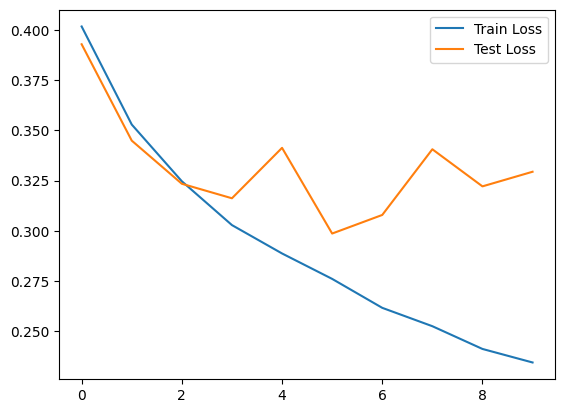

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')



# test_dataset = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Сохранение модели
torch.save(model.state_dict(), 'fashion_mnist_cnn_1.pth')


In [ ]:
# Проверка на тестовом множестве
# model = ().to(device)
model.load_state_dict(torch.load('fashion_mnist_cnn_1.pth'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        # y_true.append(labels.detach().cpu())
        # y_pred.append(outputs.detach().cpu())
        # print(outputs.data)
        # print(outputs.data.shape)
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)
        

    #     # total += labels.size(0)
    #     # correct += (predicted == labels).sum().item()

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    # acc = correct / total
    acc = accuracy_score(y_true, y_pred)
    # f1 = f1_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')

    # # print(f'Test Accuracy: {acc}')
    # print(f'Test F1 Score: {f1}')

Test Accuracy: 0.8828333333333334
Test F1 Score: 0.8789021136021716


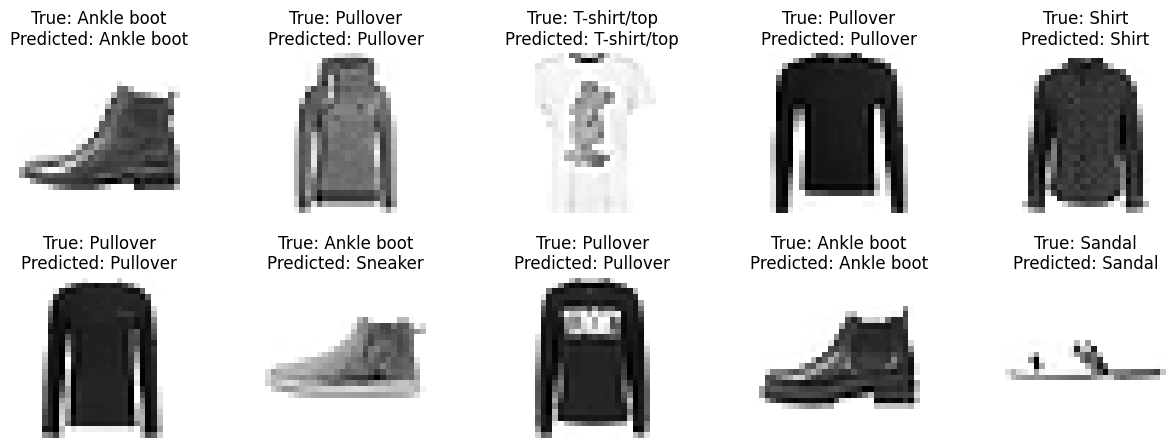

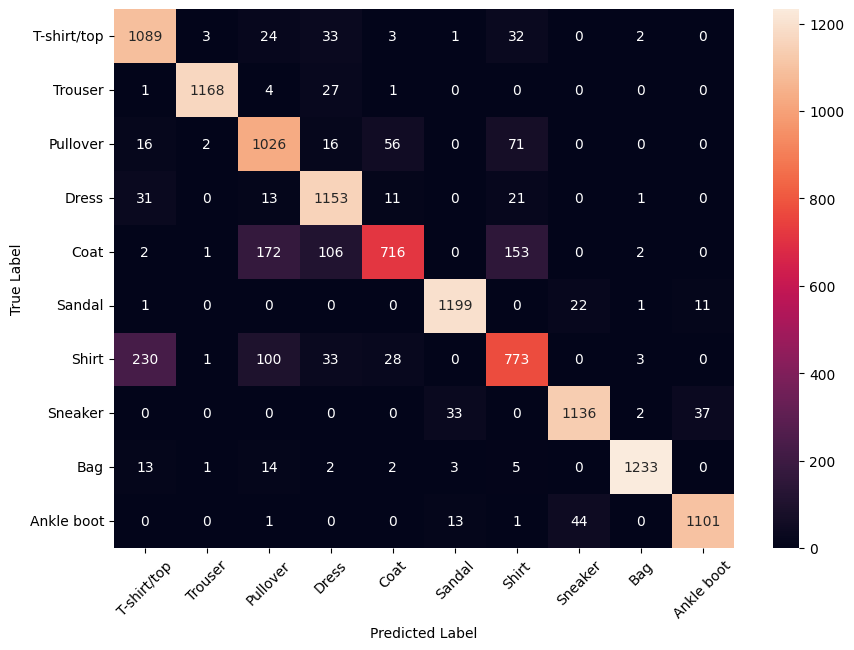

In [ ]:
# Вывод нескольких изображений и их предсказаний
images, labels = next(iter(test_loader))

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(images[j+i*5][0], cmap="binary")
        axs[i,j].set_title(f'True: {dataset.classes[labels[j+i*5]]}\nPredicted: {dataset.classes[predicted[j+i*5]]}')
        axs[i,j].axis('off')

# Вывод матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xticks(np.arange(10)+0.5, dataset.classes, rotation=45)
plt.yticks(np.arange(10)+0.5, dataset.classes, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

Сверточный слой (Convolutional layer) - это основной блок сверточной нейронной сети, который применяет свертку к входным данным. Свертка - это математическая операция, которая позволяет извлекать признаки из изображений, звуковых файлов и других типов данных. 

В сверточном слое используется набор фильтров, которые скользят (свертываются) по входным данным и вычисляют операцию свертки. Каждый фильтр обнаруживает определенные признаки во входных данных, такие как границы, текстуры, формы и т.д. В результате свертки получается карта признаков, которая затем подается на следующий слой.

Сверточные слои позволяют нейронной сети автоматически извлекать признаки из входных данных без необходимости задавать их явно. Они также помогают сократить количество параметров в сети, что упрощает ее обучение и ускоряет процесс распознавания. Сверточные сети широко используются для обработки изображений, видео, аудио и других типов данных, где важна локальная структура.


`self.conv1` является первым сверточным слоем и принимает на вход изображения с 1 каналом (черно-белые изображения), поэтому мы устанавливаем `in_channels=1`. Слой имеет 16 фильтров (out_channels=16), что означает, что он будет выдавать 16 карт признаков.

`kernel_size=3` означает, что размер ядра свертки будет 3x3, что позволяет рассматривать каждый пиксель в контексте соседних пикселей. `stride=1` означает, что ядро свертки будет перемещаться на 1 пиксель за раз, чтобы вычислить свертку со всеми пикселями в изображении. `padding=1` означает, что мы дополняем изображение нулями на границах, чтобы избежать уменьшения размера изображения после свертки.

`self.conv2` является вторым сверточным слоем и принимает на вход карты признаков, которые были выданы предыдущим сверточным слоем. В этом случае, `in_channels=16`, потому что первый сверточный слой выдал 16 карт признаков, а `out_channels=32`, что означает, что этот слой будет выдавать 32 карты признаков.

`self.pool` является слоем пуллинга, который выполняет операцию максимального пулинга на картах признаков, чтобы уменьшить размерность изображения. `kernel_size=2` означает, что мы используем окно размером 2x2 для выполнения операции максимального пулинга.

`self.fc1` является полносвязным слоем, который принимает на вход плоский вектор, полученный из карточек признаков, и выдает итоговый результат в виде 10 чисел, соответствующих классам в датасете fashionmnist. Размерность входа для этого слоя равна `32 * 7 * 7`, потому что после применения двух сверточных слоев и слоя пуллинга, размер карт признаков составляет 32x7x7.

Слой пулинга (pooling layer) в сверточных нейронных сетях является одним из основных компонентов, который используется для уменьшения размерности карт признаков, извлеченных из изображений. Он используется после сверточных слоев для сокращения количества параметров модели, уменьшения вычислительной сложности и предотвращения переобучения.

Слой пулинга работает путем разбиения карты признаков на несколько непересекающихся прямоугольных регионов (обычно 2x2 или 3x3), и затем заменяет все значения в каждом регионе на одно значение, которое является максимальным или средним значением в этом регионе. Максимальное пулингирование (max pooling) и среднее пулингирование (average pooling) являются двумя наиболее распространенными типами пулинга.

В результате применения слоя пулинга, размер карт признаков уменьшается в два раза (если используется пулинг размера 2x2), что позволяет уменьшить количество параметров модели и ускорить вычисления. Одновременно это может помочь в избежании переобучения модели, поскольку слой пулинга удаляет избыточную информацию из карт признаков и фокусируется только на наиболее важных признаках.

В сверточных нейронных сетях, слои пулинга обычно применяются после каждого сверточного слоя или нескольких сверточных слоев подряд, для того чтобы уменьшить размерность карт признаков. Они также позволяют сети получать инвариантность к небольшим трансляциям объектов в изображении, что повышает устойчивость к шуму и повышает точность классификации.

Кроме того, слои пулинга не имеют параметров, которые нужно обучать, поэтому они не увеличивают количество параметров в модели и не увеличивают вычислительную сложность.

Stride (шаг) определяет, на сколько пикселей (или элементов в других типах данных) будет сдвигаться фильтр при свертке. Если Stride больше единицы, то фильтр будет перескакивать через несколько пикселей, что уменьшает размер выходных данных. Уменьшение размера может быть полезно, например, для ускорения обучения или для сокращения количества параметров в сети.

Padding (заполнение) - это добавление нулей вокруг границ входных данных перед применением свертки. Заполнение позволяет сохранить размер выходных данных после свертки и уменьшить искажение краевых пикселей. Без заполнения свертка может привести к сокращению размера выходных данных и искажению признаков в углах изображения.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.norm1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.norm2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.norm1(x))
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(self.norm2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        return x



#### Архитектура сети

1. Conv2d layer с 1 входным каналом, 16 выходными каналами, ядром размером 3x3, шагом 1 и заполнением 1.
2. BatchNorm2d layer для нормализации выхода первого Conv2d слоя.
3. Conv2d layer с 16 входными каналами, 32 выходными каналами, ядром размером 3x3, шагом 1 и заполнением 1.
4. BatchNorm2d layer для нормализации выхода второго Conv2d слоя.
5. MaxPool2d слой с ядром размером 2x2 для уменьшения размерности изображения вдвое.
6. Conv2d layer с 32 входными каналами, 64 выходными каналами, ядром размером 3x3, шагом 1 и заполнением 1.
7. BatchNorm2d layer для нормализации выхода третьего Conv2d слоя.
8. MaxPool2d слой с ядром размером 2x2 для уменьшения размерности изображения вдвое.
9. Полносвязный слой (Linear) с 32*7*7 входными нейронами и 10 выходными нейронами.

In [ ]:
print(model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
dataset = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())

val_ratio = 0.2

train_dataset, val_dataset = random_split(
    dataset=dataset, 
    lengths=[int(len(dataset)*(1-val_ratio)), int(len(dataset)*val_ratio)],
)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch.optim as optim

model = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses = []
test_losses = []


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    test_loss = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        test_loss += loss.item() * images.size(0)
        
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')

Epoch 1, Train Loss: 0.46776397788524626, Test Loss: 0.2983776378631592
Epoch 2, Train Loss: 0.2947176768084367, Test Loss: 0.2964270146985849
Epoch 3, Train Loss: 0.26496836001674334, Test Loss: 0.2657355800469716
Epoch 4, Train Loss: 0.2445614857574304, Test Loss: 0.2550810524622599
Epoch 5, Train Loss: 0.23019877454638482, Test Loss: 0.2642658576567968
Epoch 6, Train Loss: 0.21644525140027204, Test Loss: 0.2893955105940501
Epoch 7, Train Loss: 0.21205712892611822, Test Loss: 0.24670548077424367
Epoch 8, Train Loss: 0.19885607782006265, Test Loss: 0.2594778332511584
Epoch 9, Train Loss: 0.19204687223335107, Test Loss: 0.2575514943401019
Epoch 10, Train Loss: 0.18593303923557203, Test Loss: 0.26318191381295525


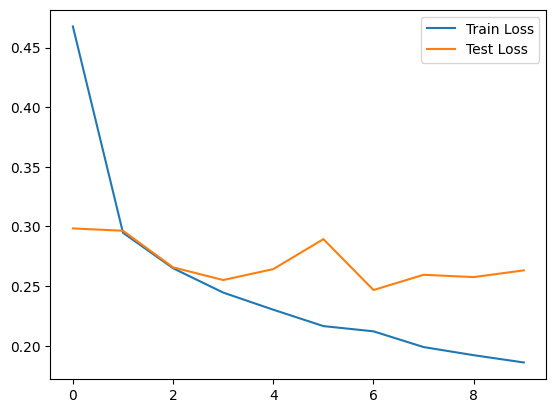

In [ ]:
torch.save(model.state_dict(), 'fashion_mnist_cnn_2.pth')

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.914
Test F1 Score: 0.9125436698811153


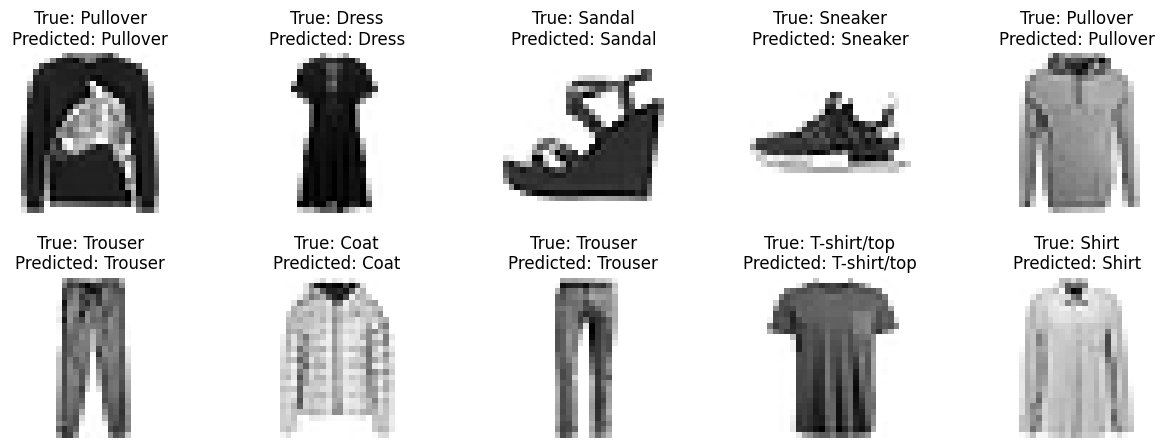

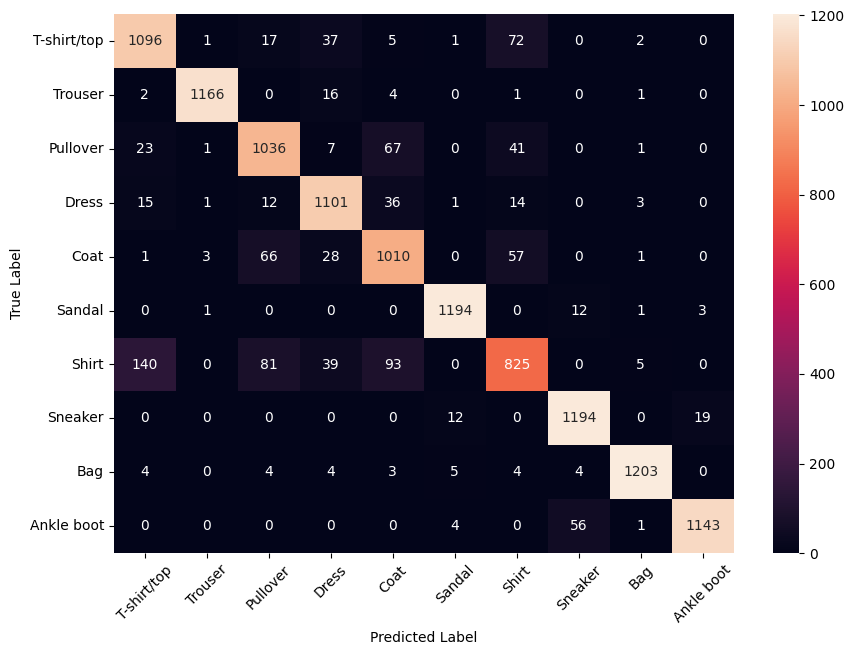

In [ ]:
# Вывод нескольких изображений и их предсказаний
images, labels = next(iter(test_loader))

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(images[j+i*5][0], cmap="binary")
        axs[i,j].set_title(f'True: {dataset.classes[labels[j+i*5]]}\nPredicted: {dataset.classes[predicted[j+i*5]]}')
        axs[i,j].axis('off')

# Вывод матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xticks(np.arange(10)+0.5, dataset.classes, rotation=45)
plt.yticks(np.arange(10)+0.5, dataset.classes, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
class CIFAR10_1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(3 * 32 * 32, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Dropout(0.5),
                nn.Linear(256, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Linear(64, 10)
            )
        
    def forward(self, x):
        return self.layers(x)

model = CIFAR10_1()

In [ ]:
data_path = "./data/cifar10"

dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

val_ratio = 0.2

train_dataset, test_dataset = random_split(
    dataset=dataset, 
    lengths=[int(len(dataset)*(1-val_ratio)), int(len(dataset)*val_ratio)],
)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')



model.to(device)

Files already downloaded and verified


CIFAR10_1(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=512, bias=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=256, out_features=64, bias=True)
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

In [ ]:
for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')


Epoch 1, Train Loss: 1.8218096534729005, Test Loss: 1.6195920113545315
Epoch 2, Train Loss: 1.6548812913894653, Test Loss: 1.52220009770363
Epoch 3, Train Loss: 1.586808807182312, Test Loss: 1.463442223087238
Epoch 4, Train Loss: 1.5369584377288819, Test Loss: 1.4279285570618454
Epoch 5, Train Loss: 1.499270359802246, Test Loss: 1.3959973033066768
Epoch 6, Train Loss: 1.4710904399871827, Test Loss: 1.3941797503999844
Epoch 7, Train Loss: 1.4443890501022338, Test Loss: 1.3575002888965
Epoch 8, Train Loss: 1.4158513891220093, Test Loss: 1.3691826777853024
Epoch 9, Train Loss: 1.3950545228958129, Test Loss: 1.3215202814454485
Epoch 10, Train Loss: 1.3733575717926025, Test Loss: 1.3669710049204007


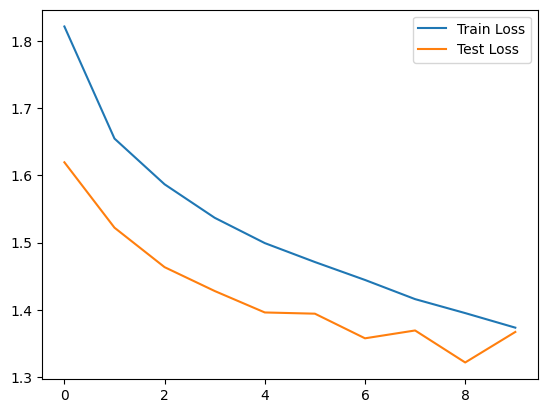

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.5125
Test F1 Score: 0.5114101292453479


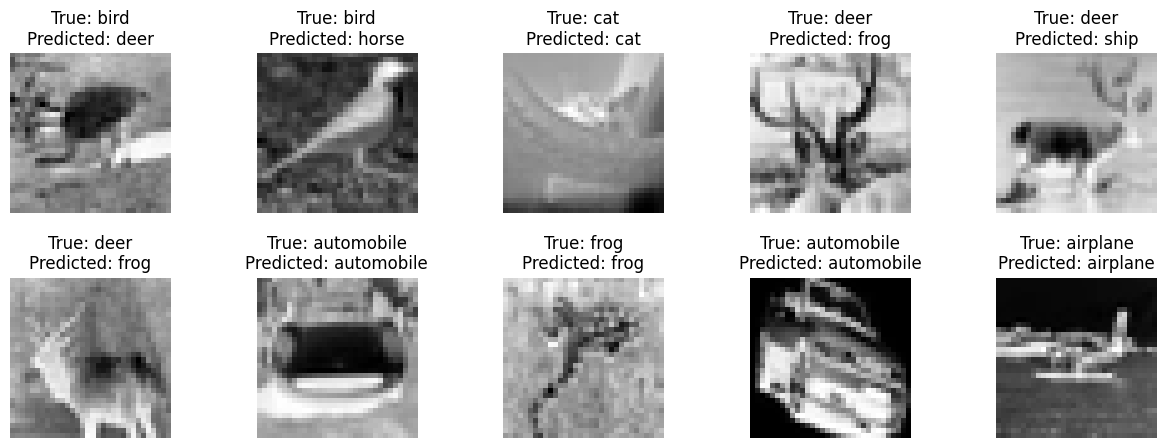

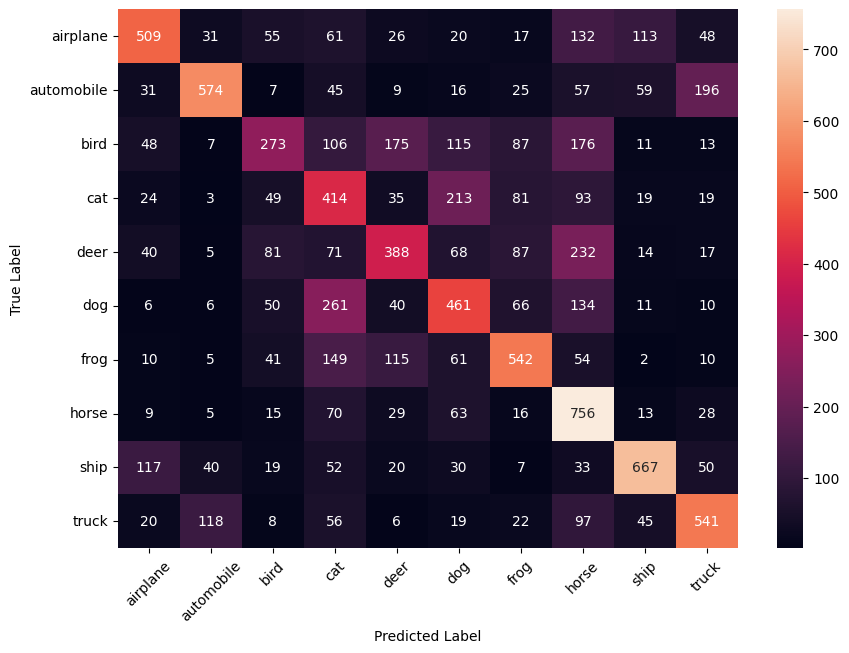

In [ ]:
# Вывод нескольких изображений и их предсказаний
images, labels = next(iter(test_loader))

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(images[j+i*5][0], cmap="binary")
        axs[i,j].set_title(f'True: {dataset.classes[labels[j+i*5]]}\nPredicted: {dataset.classes[predicted[j+i*5]]}')
        axs[i,j].axis('off')

# Вывод матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xticks(np.arange(10)+0.5, dataset.classes, rotation=45)
plt.yticks(np.arange(10)+0.5, dataset.classes, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

Мы умножаем на 8 два раза, потому что на этом этапе мы преобразуем выход сверточных слоев в вектор перед передачей его в полносвязный слой. Размер выхода сверточных слоев в нашей модели составляет 64x8x8, где 64 - это количество фильтров, 8 - это высота и ширина выхода сверточных слоев. 

Первое умножение на 8 происходит в строке `x = self.maxpool(x)`, где мы уменьшаем высоту и ширину выхода сверточных слоев в 2 раза с помощью операции max pooling. В результате, высота и ширина выхода становятся равными 8.

Второе умножение на 8 происходит в строке `x = x.view(-1, 64*8*8)`, где мы преобразуем выход сверточных слоев в вектор. Для этого мы умножаем количество фильтров (64) на высоту (8) и ширину (8) выхода сверточных слоев.

Таким образом, мы получаем одномерный вектор длиной 4096 (64*8*8), который передаётся в полносвязный слой размерности 512.

Высоту и ширину сверточного слоя определяют конфигурация сверточного слоя и размер входного изображения. 

Например, в модели из предыдущего ответа мы использовали два сверточных слоя с ядром размера 3x3 и с одинаковым заполнением (padding) равным 1. Это означает, что каждый пиксель входного изображения будет окружен пикселями из заполнения, чтобы размер выхода сверточного слоя был таким же, как и размер входа. 

Если входное изображение имеет размер 32x32 (32 пикселя по высоте и 32 пикселя по ширине), то после первого сверточного слоя размер выхода будет составлять 32x32 пикселя. Затем мы применяем операцию max pooling с ядром размера 2x2 и шагом (stride) 2, чтобы уменьшить размер выхода в 2 раза. Это дает нам выход размером 16x16 пикселей. После второго сверточного слоя размер выхода также составляет 16x16 пикселей.

Затем мы преобразуем выход сверточных слоев в вектор и передаем его в полносвязный слой. Для этого мы умножаем количество фильтров (64) на высоту (8) и ширину (8) выхода сверточных слоев, который в данном случае равен 16x16 (8 = 16/2/2).

Высота и ширина сверточного слоя определяются размером входного изображения, размером ядра свертки и параметрами padding и stride. 

Например, в случае сверточного слоя с ядром размером 3x3 и padding=1, для входного изображения размером 32x32 высота и ширина сверточного слоя будут равны 32. Если добавить stride=2, то высота и ширина сверточного слоя будут уменьшены в два раза и станут равными 16.

При последующих сверточных слоях высота и ширина могут изменяться в зависимости от размера ядра, padding, stride и количества фильтров в слое. Например, при увеличении количества фильтров высота и ширина могут уменьшаться, так как размерность выходного тензора увеличивается за счет большего количества фильтров.

In [ ]:
class CIFAR10_2(nn.Module):
    def __init__(self):
        super(CIFAR10_2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.norm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.norm2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.norm1(x))
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(self.norm2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 8* 8)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = CIFAR10_2()


In [ ]:
data_path = "./data/cifar10"

dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

val_ratio = 0.2

train_dataset, test_dataset = random_split(
    dataset=dataset, 
    lengths=[int(len(dataset)*(1-val_ratio)), int(len(dataset)*val_ratio)],
)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')



model.to(device)

Files already downloaded and verified


CIFAR10_2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

In [ ]:
for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')


Epoch 1, Train Loss: 1.575223388004303, Test Loss: 1.5451257593312842
Epoch 2, Train Loss: 1.0505120407104491, Test Loss: 1.9316530888247643
Epoch 3, Train Loss: 0.9507938481330872, Test Loss: 1.0150830244562428
Epoch 4, Train Loss: 0.8652219688415528, Test Loss: 0.9889504719691672
Epoch 5, Train Loss: 0.8067005467891694, Test Loss: 0.9926840814815205
Epoch 6, Train Loss: 0.7387561153411866, Test Loss: 0.967488574753901
Epoch 7, Train Loss: 0.6901793467998505, Test Loss: 1.443146718915101
Epoch 8, Train Loss: 0.641055191040039, Test Loss: 1.0411029625090824


KeyboardInterrupt: 

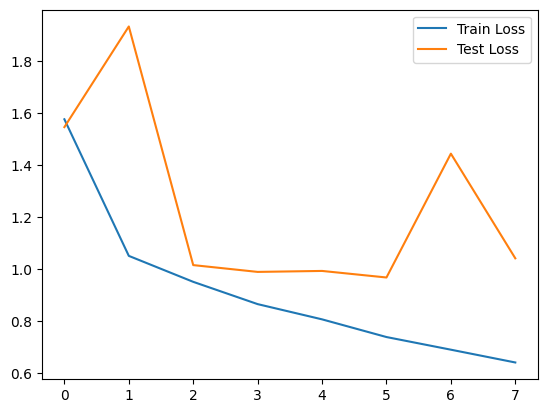

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.697
Test F1 Score: 0.6967558708491111


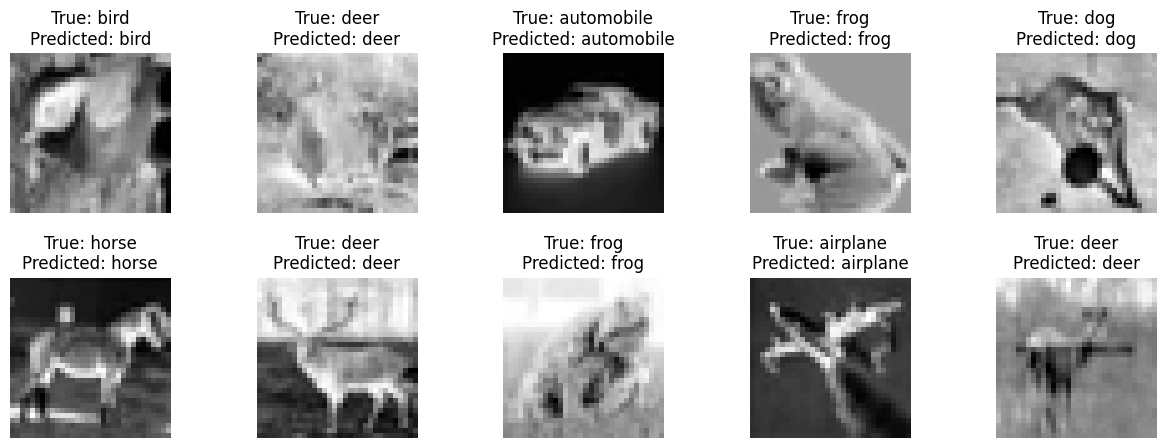

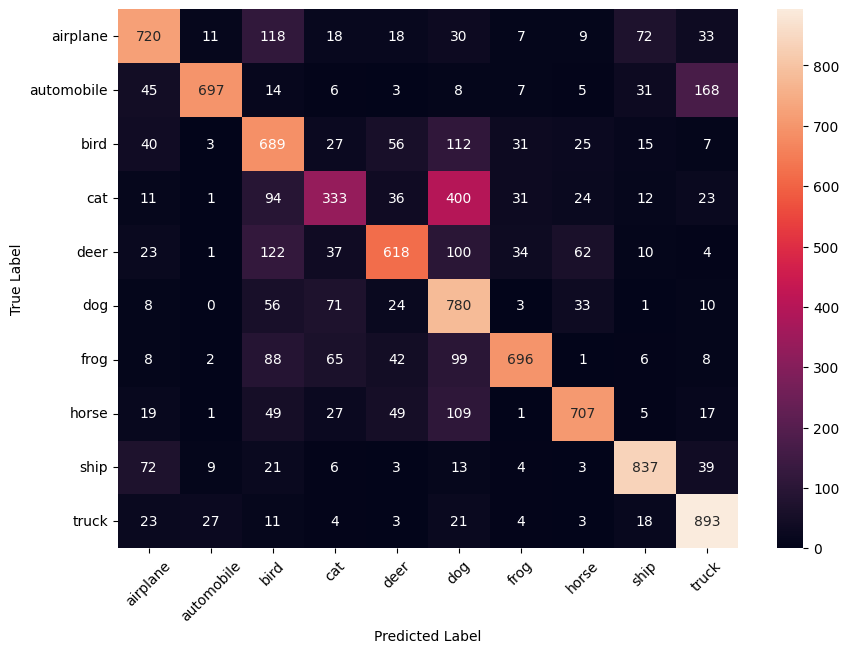

In [ ]:
# Вывод нескольких изображений и их предсказаний
images, labels = next(iter(test_loader))

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(images[j+i*5][0], cmap="binary")
        axs[i,j].set_title(f'True: {dataset.classes[labels[j+i*5]]}\nPredicted: {dataset.classes[predicted[j+i*5]]}')
        axs[i,j].axis('off')

# Вывод матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xticks(np.arange(10)+0.5, dataset.classes, rotation=45)
plt.yticks(np.arange(10)+0.5, dataset.classes, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [ ]:
import os
from torchvision.datasets import ImageFolder
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class LoadMonkeys(Dataset):
    def __init__(self, root_dir, val_dir, transform=None):
        # self.train_dataset = ImageFolder(root="data/custom_dataset_monkey/training", transform=data_transform)
        # self.test_dataset = ImageFolder(root="data/custom_dataset_monkey/validation", transform=data_transform)
        
        self.root_dir = root_dir
        self.val_dir = val_dir
        self.transform = transform
        # self.classes = ["mantled_howler", "patas_monkey", "bald_uakari", "japanese_macaque",
        #                 "pygmy_marmoset", "white_headed_capuchin", "silvery_marmoset",
        #                 "common_squirrel_monkey", "black_headed_night_monkey", "nilgiri_langur"]
        self.classes = [f"n{i}" for i in range(10)]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = []
        for cls in self.classes:
            cls_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, self.class_to_idx[cls]))
        for cls in self.classes:
            cls_path = os.path.join(self.val_dir, cls)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, self.class_to_idx[cls]))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, target = self.images[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img, target

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split

# data_transform = transforms.Compose([
#         transforms.Resize((400, 400)),  # изменение размера изображений до 400x400
#         transforms.ToTensor()  # преобразование изображений в тензоры
#     ])

data_transform = transforms.Compose([
    # transforms.RandomResizedCrop(400),  # случайное обрезание и изменение размера до 224x224
      # случайное отражение по горизонтали
    transforms.Resize((400, 400)),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # изменение яркости, контраста, насыщенности и тона
    transforms.ToTensor(),  # преобразование изображения в тензор
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # нормализация средним и стандартным отклонением
])
# train_dataset = ImageFolder(root="data/custom_dataset_monkey/training", transform=data_transform)
# test_dataset = ImageFolder(root="data/custom_dataset_monkey/validation", transform=data_transform)

dataset = LoadMonkeys(root_dir="training/training", val_dir="validation/validation", transform=data_transform)
# test_dataset = LoadMonkeys(root_dir="validation/validation", transform=data_transform)

batch_size = 32

val_ds_size = int(len(dataset) * 0.20)
train_ds_size = len(dataset) - val_ds_size
train_dataset, val_dataset = random_split(dataset, [train_ds_size, val_ds_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


In [ ]:

len(dataset)

1370

<function matplotlib.pyplot.show(close=None, block=None)>

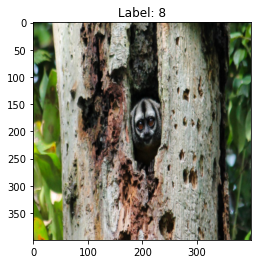

In [ ]:
images, labels = next(iter(test_loader))
image = images[0].numpy().transpose((1, 2, 0))

plt.imshow(image)
plt.title("Label: {}".format(labels[0]))
plt.show

In [ ]:
plt

In [ ]:
dataset_classes = ["mantled_howler", "patas_monkey", "bald_uakari", "japanese_macaque",
                        "pygmy_marmoset", "white_headed_capuchin", "silvery_marmoset",
                        "common_squirrel_monkey", "black_headed_night_monkey", "nilgiri_langur"]

test_dataset.classes = dataset_classes
train_dataset.classes = dataset_classes

In [ ]:
test_dataset.classes, train_dataset.classes

AttributeError: ignored

In [ ]:
dataset[0][0].shape

torch.Size([3, 400, 400])

In [ ]:
class MonkeyModel(nn.Module):
    def __init__(self):
        super(MonkeyModel, self).__init__()
        # На вход изображение 3х400х400
        # Первый слой свертки, делаем 16 фильтров с размером ядра 10, падингом 1, шагом 2
        self.conv1 = nn.Conv2d(3, 64, kernel_size=10, padding=1, stride=2)
        # C - кол-во каналов, H, W - высота и ширина
        # F - размер свертки (просматриваемая область) - 5
        self.norm1 = nn.BatchNorm2d(64)
        # print(3 * ((400 - 7 + 2) // 3 + 1) * ((400 - 7 + 2) // 3 + 1))
        # 64 * 197 * 197
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, padding=1, stride=2)
        # 64 * 98 * 98
        self.norm2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=2)
        # 64 * 49 * 49
        self.norm3 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 64 * 24 * 24
        
        # self.norm2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 24 * 24, 1024)
        self.norm1_1d = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.norm2_1d = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.norm3_1d = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.norm1(x))
        x = self.conv2(x)
        x = nn.functional.relu(self.norm2(x))
        x = self.conv3(x)
        x = nn.functional.relu(self.norm3(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 24 * 24)
        x = nn.functional.relu(self.norm1_1d(self.fc1(x)))
        x = nn.functional.relu(self.norm2_1d(self.fc2(x)))
        x = nn.functional.relu(self.norm3_1d(self.fc3(x)))
        return nn.functional.log_softmax(x, dim=1)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MonkeyModel().to(device)


52272


In [ ]:
model

MonkeyModel(
  (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(2, 2), padding=(1, 1))
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=36864, out_features=1024, bias=True)
  (norm1_1d): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (norm2_1d): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (norm3_1d): Ba

In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Количество обучаемых параметров: {total_params}")

Количество обучаемых параметров: 38571082


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

train_losses = []
test_losses = []

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

58

In [ ]:
for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')


<ipython-input-64-6c6eb4d1f2c9>:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


Epoch 1, Train Loss: 4.812239442552839, Test Loss: 4.621942228741116
Epoch 2, Train Loss: 3.8152279581342423, Test Loss: 3.7700784471299915
Epoch 3, Train Loss: 3.056273283277239, Test Loss: 3.504785034391615
Epoch 4, Train Loss: 2.487616208621434, Test Loss: 3.1018919150034585
Epoch 5, Train Loss: 1.931814125605992, Test Loss: 2.990734895070394
Epoch 6, Train Loss: 1.5354717458997453, Test Loss: 2.883160856035021
Epoch 7, Train Loss: 1.278827748979841, Test Loss: 2.649752060572306
Epoch 8, Train Loss: 1.0967587947845459, Test Loss: 2.3853409025404186
Epoch 9, Train Loss: 0.986862485749381, Test Loss: 2.3093529674741955
Epoch 10, Train Loss: 0.8147890993527004, Test Loss: 2.2205320994059243


<ipython-input-64-6c6eb4d1f2c9>:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


Epoch 1, Train Loss: 0.7165001741477421, Test Loss: 2.196131388346354
Epoch 2, Train Loss: 0.6838586262294224, Test Loss: 2.204192452960544
Epoch 3, Train Loss: 0.5869611765657152, Test Loss: 2.0621802939309015
Epoch 4, Train Loss: 0.5618451969964163, Test Loss: 1.9025617705451117
Epoch 5, Train Loss: 0.44885591098240446, Test Loss: 1.9322811762491863
Epoch 6, Train Loss: 0.43448985176427024, Test Loss: 2.036161634657118


KeyboardInterrupt: ignored

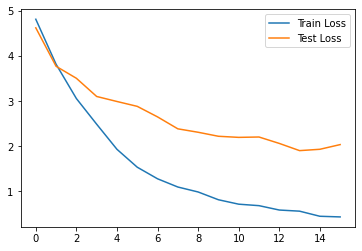

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


<ipython-input-64-6c6eb4d1f2c9>:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


Test Accuracy: 0.6386861313868614
Test F1 Score: 0.6381101221647245


<ipython-input-64-6c6eb4d1f2c9>:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


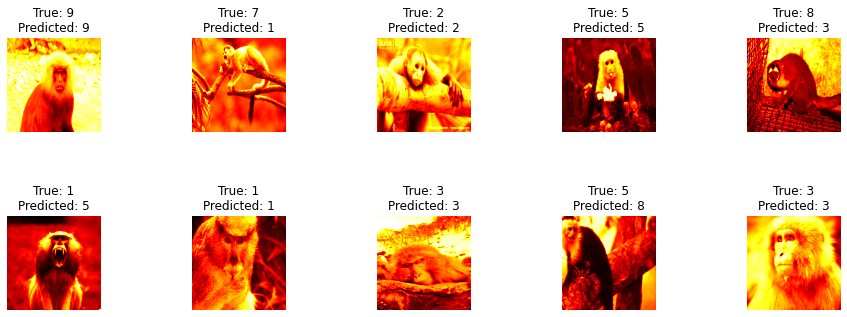

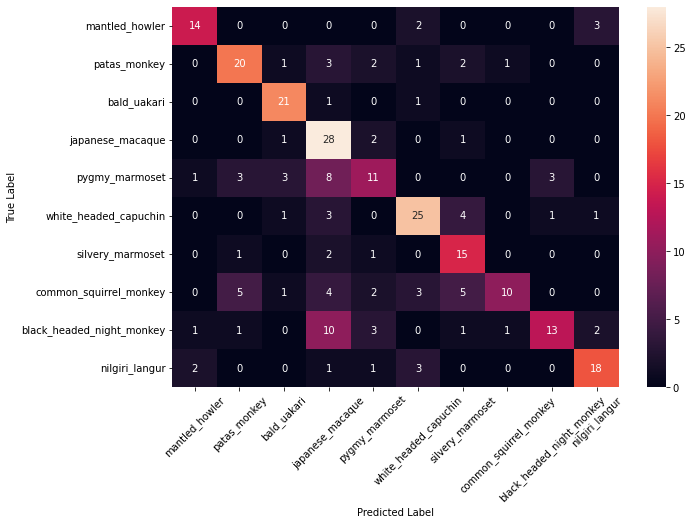

In [ ]:
# Вывод нескольких изображений и их предсказаний
dataset_classes = ["mantled_howler", "patas_monkey", "bald_uakari", "japanese_macaque",
                        "pygmy_marmoset", "white_headed_capuchin", "silvery_marmoset",
                        "common_squirrel_monkey", "black_headed_night_monkey", "nilgiri_langur"]
images, labels = next(iter(test_loader))

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.9, wspace=0.9)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(images[j+i*5][0], cmap="hot")
        axs[i,j].set_title(f'True: {labels[j+i*5]}\nPredicted: {predicted[j+i*5]}')
        axs[i,j].axis('off')

# Вывод матрицы ошибок
y_true = []
y_pred = []
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    # acc = accuracy_score(y_true, y_pred)
    # f1 = f1_score(y_true, y_pred, average="macro")

    # print(f'Test Accuracy: {acc}')
    # print(f'Test F1 Score: {f1}')

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xticks(np.arange(10)+0.5, dataset_classes, rotation=45)
plt.yticks(np.arange(10)+0.5, dataset_classes, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/data/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 1371/1371 [00:17<00:00, 79.34it/s] 


### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

In [2]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/data/cats_dogs.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 25004/25004 [00:22<00:00, 1094.72it/s]


In [3]:
import os
from torchvision.datasets import ImageFolder
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class LoadCatsDogs(Dataset):
    def __init__(self, root_dir, transform=None):
        # self.train_dataset = ImageFolder(root="data/custom_dataset_monkey/training", transform=data_transform)
        # self.test_dataset = ImageFolder(root="data/custom_dataset_monkey/validation", transform=data_transform)
        
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ["cat", "dog"]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = []
        for cls in self.classes:
            cls_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, self.class_to_idx[cls]))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, target = self.images[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img, target

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split


data_transform = transforms.Compose([
    # transforms.RandomResizedCrop(400),  # случайное обрезание и изменение размера до 224x224
      # случайное отражение по горизонтали
    transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # изменение яркости, контраста, насыщенности и тона
    transforms.ToTensor(),  # преобразование изображения в тензор
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # нормализация средним и стандартным отклонением
])

dataset = LoadCatsDogs(root_dir="cats_dogs/train", transform=data_transform)
# test_dataset = LoadMonkeys(root_dir="validation/validation", transform=data_transform)

batch_size = 16

val_ds_size = int(len(dataset) * 0.30)
train_ds_size = len(dataset) - val_ds_size
train_dataset, test_dataset = random_split(dataset, [train_ds_size, val_ds_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
class CatDog(nn.Module):
    def __init__(self):
        super(CatDog, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=10, padding=1, stride=2)
        self.norm1 = nn.BatchNorm2d(32)
        # 32 * 109 * 109
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5, padding=1, stride=2)
        # 32 * 54 * 54
        self.norm2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, padding=1, stride=1)
        # 32 * 54 * 54
        self.norm3 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 32 * 27 * 27
        
        self.fc1 = nn.Linear(32 * 27 * 27, 1024)
        self.norm1_1d = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.norm2_1d = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.norm3_1d = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.norm1(x))
        x = self.conv2(x)
        x = nn.functional.relu(self.norm2(x))
        x = self.conv3(x)
        x = nn.functional.relu(self.norm3(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 27 * 27)
        x = nn.functional.relu(self.norm1_1d(self.fc1(x)))
        x = nn.functional.relu(self.norm2_1d(self.fc2(x)))
        x = nn.functional.relu(self.norm3_1d(self.fc3(x)))
        return nn.functional.log_softmax(x, dim=1)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CatDog().to(device)


In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Количество обучаемых параметров: {total_params}")

Количество обучаемых параметров: 24595882


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

train_losses = []
test_losses = []

import gc
torch.cuda.empty_cache()
gc.collect()

8

In [ ]:
for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')


Epoch 1, Train Loss: 3.281027331975522, Test Loss: 1.9373948130526268
Epoch 2, Train Loss: 1.2845000257167345, Test Loss: 1.1866303926337756
Epoch 3, Train Loss: 0.9938090133874028, Test Loss: 0.8495302188879391
Epoch 4, Train Loss: 0.916269208057707, Test Loss: 0.8418202767494136
Epoch 5, Train Loss: 0.868379070864517, Test Loss: 0.7362363900838376
Epoch 6, Train Loss: 0.8184460572884767, Test Loss: 0.7819067254376564
Epoch 7, Train Loss: 0.8359891399604965, Test Loss: 0.6413135659465912
Epoch 8, Train Loss: 0.7508124278439464, Test Loss: 0.6820893818889854
Epoch 9, Train Loss: 0.7022109660686043, Test Loss: 0.6290522016314809
Epoch 10, Train Loss: 0.6466196196279752, Test Loss: 0.6516815329919746


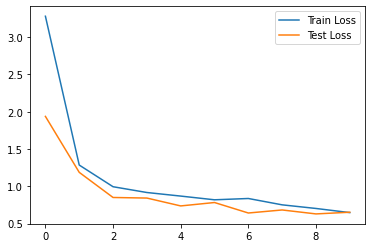

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.7061333333333333
Test F1 Score: 0.7061257892558166


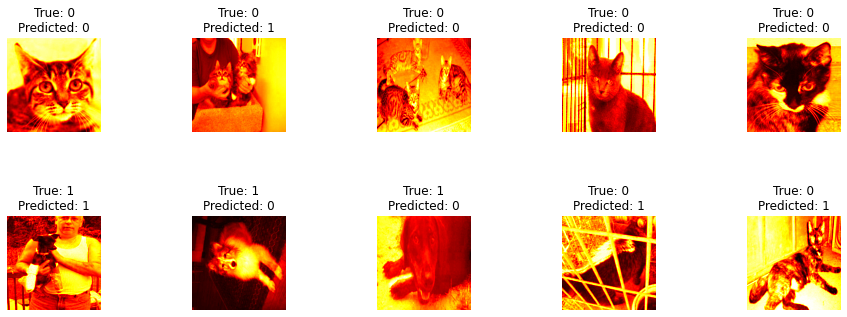

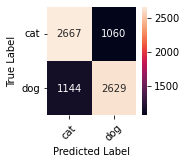

In [ ]:
# Вывод нескольких изображений и их предсказаний
dataset_classes = ["cat", "dog"]
images, labels = next(iter(test_loader))

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.9, wspace=0.9)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(images[j+i*5][0], cmap="hot")
        axs[i,j].set_title(f'True: {labels[j+i*5]}\nPredicted: {predicted[j+i*5]}')
        axs[i,j].axis('off')

# Вывод матрицы ошибок
y_true = []
y_pred = []
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
                
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='g')
plt.xticks(np.arange(2)+0.5, dataset_classes, rotation=45)
plt.yticks(np.arange(2)+0.5, dataset_classes, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


In [5]:
import os
from torchvision.datasets import ImageFolder
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class LoadMonkeys(Dataset):
    def __init__(self, root_dir, val_dir, transform=None):
        # self.train_dataset = ImageFolder(root="data/custom_dataset_monkey/training", transform=data_transform)
        # self.test_dataset = ImageFolder(root="data/custom_dataset_monkey/validation", transform=data_transform)
        
        self.root_dir = root_dir
        self.val_dir = val_dir
        self.transform = transform
        # self.classes = ["mantled_howler", "patas_monkey", "bald_uakari", "japanese_macaque",
        #                 "pygmy_marmoset", "white_headed_capuchin", "silvery_marmoset",
        #                 "common_squirrel_monkey", "black_headed_night_monkey", "nilgiri_langur"]
        self.classes = [f"n{i}" for i in range(10)]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = []
        for cls in self.classes:
            cls_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, self.class_to_idx[cls]))
        for cls in self.classes:
            cls_path = os.path.join(self.val_dir, cls)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, self.class_to_idx[cls]))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, target = self.images[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img, target

In [8]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split



data_transform = transforms.Compose([
    # transforms.RandomResizedCrop(400),  # случайное обрезание и изменение размера до 224x224
      # случайное отражение по горизонтали
    transforms.Resize((224, 224)),
    # transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # изменение яркости, контраста, насыщенности и тона
    transforms.ToTensor(),  # преобразование изображения в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # нормализация средним и стандартным отклонением
])
# train_dataset = ImageFolder(root="data/custom_dataset_monkey/training", transform=data_transform)
# test_dataset = ImageFolder(root="data/custom_dataset_monkey/validation", transform=data_transform)

# dataset = LoadMonkeys(root_dir="data/custom_dataset_monkey/training/training", val_dir="data/custom_dataset_monkey/validation/validation", transform=data_transform)
dataset = LoadMonkeys(root_dir="training/training", val_dir="validation/validation", transform=data_transform)

batch_size = 32

val_ds_size = int(len(dataset) * 0.20)
train_ds_size = len(dataset) - val_ds_size
train_dataset, test_dataset = random_split(dataset, [train_ds_size, val_ds_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


len(dataset)

1370

In [9]:
from torchvision.models import vgg16

model = vgg16(pretrained=True)

num_classes = len(dataset.classes)
in_features = model.classifier[0].in_features
model.fc = torch.nn.Linear(in_features, num_classes)

print(model)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Количество обучаемых параметров: {total_params}")

Количество обучаемых параметров: 138608434


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

train_losses = []
test_losses = []

import gc
torch.cuda.empty_cache()
gc.collect()

for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')


Epoch 1, Train Loss: 11.29251367024013, Test Loss: 2.427195416556464
Epoch 2, Train Loss: 2.4078989573887415, Test Loss: 2.347306410471598
Epoch 3, Train Loss: 2.353786979402815, Test Loss: 2.306823174158732
Epoch 4, Train Loss: 2.338111046382359, Test Loss: 2.334522459242079
Epoch 5, Train Loss: 2.341036115373884, Test Loss: 2.3120096259646945
Epoch 6, Train Loss: 2.338634661265782, Test Loss: 2.315606117248535
Epoch 7, Train Loss: 2.334466518674578, Test Loss: 2.3183939192030163
Epoch 8, Train Loss: 2.315686913899013, Test Loss: 2.338782866795858
Epoch 9, Train Loss: 2.330538068498884, Test Loss: 2.318802171283298
Epoch 10, Train Loss: 2.3396560873304093, Test Loss: 2.3329693741268582


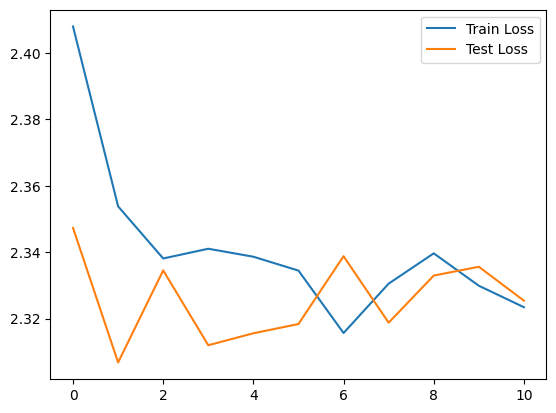

In [14]:
plt.plot(train_losses[1:], label='Train Loss')
plt.plot(test_losses[1:], label='Test Loss')
plt.legend()
plt.show()

In [15]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.06569343065693431
Test F1 Score: 0.012328767123287673


### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)

In [8]:
from torchvision.models import resnet18

model = resnet18(pretrained=True)

num_classes = len(dataset.classes)
in_features = model.fc.in_features
model.fc = torch.nn.Linear(in_features, num_classes)

print(model)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Количество обучаемых параметров: {total_params}")

Количество обучаемых параметров: 11177538


In [10]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split


data_transform = transforms.Compose([
    # transforms.RandomResizedCrop(400),  # случайное обрезание и изменение размера до 224x224
      # случайное отражение по горизонтали
    transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # изменение яркости, контраста, насыщенности и тона
    transforms.ToTensor(),  # преобразование изображения в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # нормализация средним и стандартным отклонением
])

dataset = LoadCatsDogs(root_dir="cats_dogs/train", transform=data_transform)
# test_dataset = LoadMonkeys(root_dir="validation/validation", transform=data_transform)

batch_size = 16

val_ds_size = int(len(dataset) * 0.20)
train_ds_size = len(dataset) - val_ds_size
train_dataset, test_dataset = random_split(dataset, [train_ds_size, val_ds_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

train_losses = []
test_losses = []

import gc
torch.cuda.empty_cache()
gc.collect()

8

In [12]:
for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')

Epoch 1, Train Loss: 0.67299466599226, Test Loss: 0.755366850965701
Epoch 2, Train Loss: 0.5416318315029144, Test Loss: 0.5384351469266909
Epoch 3, Train Loss: 0.41870959538817404, Test Loss: 0.3589549920619867
Epoch 4, Train Loss: 0.3128008817642927, Test Loss: 0.2609326113908055
Epoch 5, Train Loss: 0.23402949357926844, Test Loss: 0.22530645677171196
Epoch 6, Train Loss: 0.20485926556289197, Test Loss: 0.2822582332518535
Epoch 7, Train Loss: 0.1748693142399192, Test Loss: 0.18027665947501462
Epoch 8, Train Loss: 0.1441295988962054, Test Loss: 0.15919721141284982
Epoch 9, Train Loss: 0.12576065842472017, Test Loss: 0.18946922455613796
Epoch 10, Train Loss: 0.10682688485011459, Test Loss: 0.1947817392379474


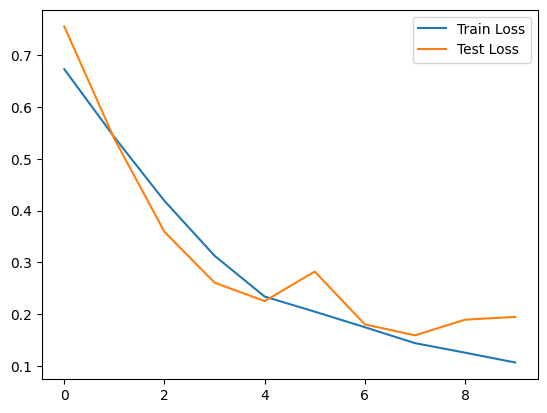

In [14]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [13]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.9244
Test F1 Score: 0.9242836512298258
